In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as pch
import numpy as np
import json

In [49]:
def box(xmin, xmax, ymin, ymax):
    return np.array([[xmin, ymin], [xmax, ymin], [xmax, ymax], [xmin, ymax]])


(-1.0, 401.0)

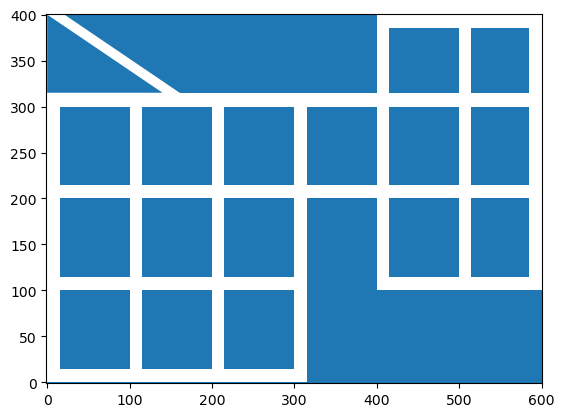

In [50]:
polygons = [
    # environment boundaries
    box(-1, 0, 0, 400),
    box(0, 600, 400, 401),
    box(600, 601, 0, 400),
    box(0, 600, -1, 0),
    # =====================
    box(15, 100, 15, 100),
    box(115, 200, 15, 100),
    box(215, 300, 15, 100),
    box(315, 600, 0, 100),
    box(15, 100, 115, 200),
    box(115, 200, 115, 200),
    box(215, 300, 115, 200),
    box(15, 100, 215, 300),
    box(115, 200, 215, 300),
    box(215, 300, 215, 300),
    np.array([[0, 315], [120, 315], [0, 480]]),
    np.array([[161.2, 315], [400, 315], [400, 400], [21.2, 400]]),
    box(315, 400, 100, 200),
    box(315, 400, 215, 300),
    box(415, 500, 115, 200),
    box(415, 500, 215, 300),
    box(415, 500, 315, 385),
    box(515, 585, 115, 200),
    box(515, 585, 215, 300),
    box(515, 585, 315, 385),
]



bbox = (min([p[:, 0].min() for p in polygons]), max([p[:, 0].max() for p in polygons]), min([p[:, 1].min() for p in polygons]), max([p[:, 1].max() for p in polygons]))
fig = plt.figure()
ax = fig.add_subplot()

for polygon in polygons:
    ax.add_patch(pch.Polygon(polygon))

ax.set_xlim(bbox[:2])
ax.set_ylim(bbox[2:])

In [51]:
for i in range(len(polygons)):
    polygons[i] = polygons[i].tolist()
    for j in range(len(polygons[i])):
        for k in range(len(polygons[i][j])):
            polygons[i][j][k] = float(polygons[i][j][k])
save = {}
bbox = [float(p) for p in bbox]
save['bounds'] = bbox
save['polygons'] = polygons
with open('../data/tunnels.json', 'w') as f:
    json.dump(save, f)